In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [ ]:
0 1

0.7

0.7 + 0.5 * 0.8

0.7 + 0.4

1.1

1
==========================
0.99

0.99 + 0.5 * 0.8 = 0.99 +0.4

1.39

clip(1.39)

1

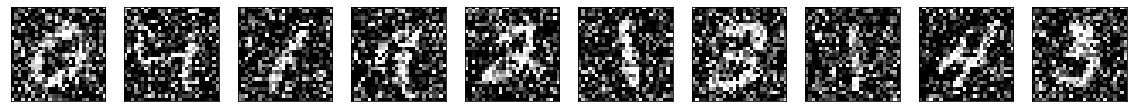

In [2]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [3]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
autoencoder.fit(x_train_noisy, x_train,  epochs=10,  batch_size=1024, shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
59/59 [==============================] - 46s 786ms/step - loss: 0.1339 - val_loss: 0.1283
Epoch 2/10
59/59 [==============================] - 51s 871ms/step - loss: 0.1263 - val_loss: 0.1223
Epoch 3/10
59/59 [==============================] - 46s 772ms/step - loss: 0.1225 - val_loss: 0.1205
Epoch 4/10
59/59 [==============================] - 45s 761ms/step - loss: 0.1199 - val_loss: 0.1175
Epoch 5/10
59/59 [==============================] - 46s 785ms/step - loss: 0.1184 - val_loss: 0.1164
Epoch 6/10
59/59 [==============================] - 67s 1s/step - loss: 0.1164 - val_loss: 0.1150
Epoch 7/10
59/59 [==============================] - 74s 1s/step - loss: 0.1152 - val_loss: 0.1137
Epoch 8/10
59/59 [==============================] - 74s 1s/step - loss: 0.1140 - val_loss: 0.1121
Epoch 9/10
59/59 [==============================] - 71s 1s/step - loss: 0.1130 - val_loss: 0.1109
Epoch 10/10
59/59 [==============================] - 52s 873ms/step - loss: 0.1115 - val_loss: 0.1098


In [6]:
decoded_imgs = autoencoder.predict(x_test_noisy)

First row is orignal images


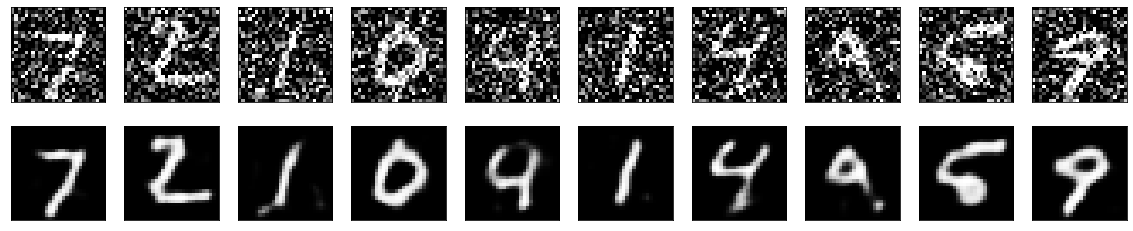

Second row is reconstrcuted images


In [7]:
import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')